- What is blossom algorithm? The Blossom algorithm (also known as the Edmonds' matching algorithm) is an algorithm in graph theory used for finding the maximum matching in any graph.
- Key idea: Edmonds realized that an odd-length cycle could be "squeezed" (contracted) into a single, artificial vertex. This cycle was named a blossom.
- How the algorithm works? he algorithm works iteratively, attempting to increase the current matching:
1. It searches for an augmenting path (a path that starts and ends at a free vertex, with edges alternating between free and matched).
2. If it encounters an odd cycle (a blossom) during the search, it "contracts" it into a single point.
3. It continues the search in this simplified (contracted) graph.
4. If it finds a path in the compressed graph, it "expands" (lifts) the blossom back to its original form, adjusting the edges inside the cycle accordingly to maintain path continuity.
5. The process repeats until no more augmenting paths can be found.

In [5]:
# Class Definition and LCA Helper
class BlossomGraph:
    def __init__(self, n, edges):
        self.n = n
        self.adj = [[] for _ in range(n)]
        for u, v in edges:
            self.adj[u].append(v)
            self.adj[v].append(u)
        
        self.match = [-1] * n  # Stores the matching (match[u] = v)
        self.p = [-1] * n      # Parent in the search tree
        self.base = []         # Points to the base of the blossom
        self.used = []         # Visited array for BFS

    # Helper to find the Lowest Common Ancestor (LCA) of u and v
    # This helps identify the "root" of the blossom
    def get_lca(self, root, u, v):
        inp = [False] * self.n
        while True:
            u = self.base[u]
            inp[u] = True
            if u == root: break
            u = self.p[self.match[u]]
            
        while True:
            v = self.base[v]
            if inp[v]: return v
            v = self.p[self.match[v]]

In [6]:
# 1. It searches for an augmenting path
# We use a BFS queue to find paths alternating between matched and unmatched edges
def find_augmenting_path(self, root):
    self.used = [False] * self.n
    self.p = [-1] * self.n
    self.base = list(range(self.n)) # Initially, every node is its own base
    
    self.used[root] = True
    q = [root]
    
    while q:
        u = q.pop(0)
        for v in self.adj[u]:
            # If v is already in the same blossom or matched to u, ignore
            if self.base[u] == self.base[v] or self.match[u] == v:
                continue
            
            # If v is the root or we found an odd cycle (visited and matched)
            if v == root or (self.match[v] != -1 and self.p[self.match[v]] != -1):
                # This indicates a blossom (Handled in next cell)
                cur_base = self.get_lca(root, u, v)
                self.contract_blossom(u, v, cur_base, q)
            
            # If v is unvisited, we extend the tree
            elif self.p[v] == -1:
                self.p[v] = u
                if self.match[v] == -1:
                    return v # Augmenting path found
                
                # Extend search
                self.used[self.match[v]] = True
                q.append(self.match[v])
                
    return -1

# Attach method to class
BlossomGraph.find_augmenting_path = find_augmenting_path

In [7]:
# 2. If it encounters an odd cycle (a blossom), it "contracts" it
# This function marks the nodes in the blossom so they are treated as a single node
def mark_blossom(self, u, b, children, q):
    while self.base[u] != b:
        partner = self.match[u]
        self.p[u] = children
        self.p[partner] = u
        
        # These nodes are added to Q to continue search from them
        if not self.used[partner]:
            self.used[partner] = True
            q.append(partner)
            
        self.base[u] = self.base[partner] = b
        u = self.p[partner]

# Attach method to class
BlossomGraph.mark_blossom = mark_blossom

In [8]:
# 3. It continues the search in this simplified (contracted) graph
# We use the mark_blossom helper to contract both sides of the cycle up to the LCA.
def contract_blossom(self, u, v, cur_base, q):
    # Contract the path from u to the LCA
    self.mark_blossom(u, cur_base, v, q)
    # Contract the path from v to the LCA
    self.mark_blossom(v, cur_base, u, q)

# Attach method to class
BlossomGraph.contract_blossom = contract_blossom

In [9]:
# 4. If it finds a path, it "expands" (lifts) the blossom adjusting edges
# We traverse the parent pointers to flip the matching status of edges along the path.
def augment_path(self, path_end):
    curr = path_end
    while curr != -1:
        prev = self.p[curr]
        next_node = self.match[prev]
        
        self.match[curr] = prev
        self.match[prev] = curr
        
        curr = next_node

# Attach method to class
BlossomGraph.augment_path = augment_path

In [10]:
# 5. The process repeats until no more augmenting paths can be found
def solve(self):
    # Iterate over all vertices
    for i in range(self.n):
        # Start a search only from unmatched vertices
        if self.match[i] == -1:
            target = self.find_augmenting_path(i)
            
            # If a path was found, augment the matching
            if target != -1:
                self.augment_path(target)
                
    return self.match

# Attach method to class
BlossomGraph.solve = solve

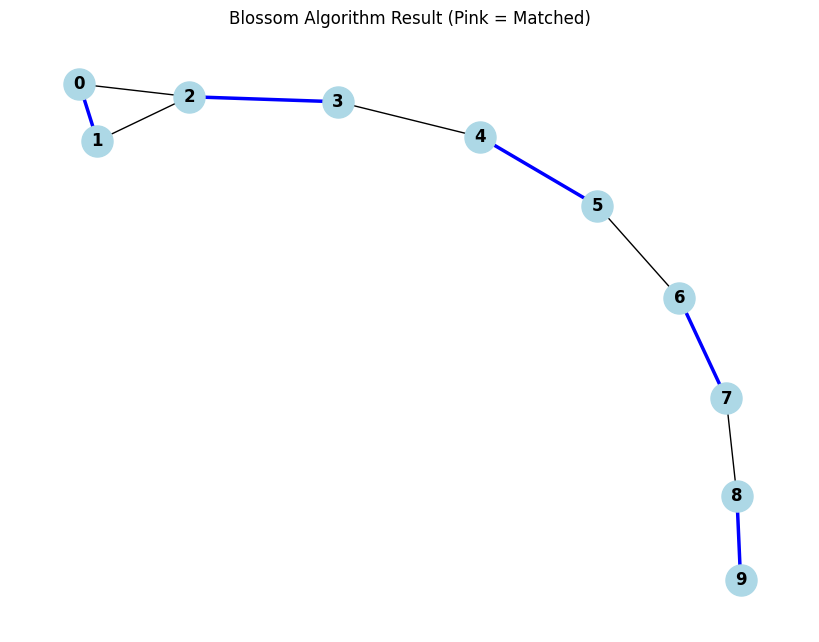

Final Matching Array: [1, 0, 3, 2, 5, 4, 7, 6, 9, 8]


In [16]:
# 6. Visualization and Testing
# We use NetworkX to draw the graph and Matplotlib to display it
import networkx as nx
import matplotlib.pyplot as plt

# Define a test graph (0 to 9) 
# This graph has a known odd cycle (0-1-2-0) to test blossom contraction.
num_nodes = 10
edges = [
    (0, 1), (1, 2), (2, 0),  # Triangle (Blossom)
    (2, 3), (3, 4), (4, 5),
    (5, 6), (6, 7), (7, 8), (8, 9)
]

# Run the Algorithm
blossom_solver = BlossomGraph(num_nodes, edges)
matching_result = blossom_solver.solve()

# Visualization Logic
def visualize_matching(n, original_edges, match_array):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(original_edges)
    
    # Identify matched edges for coloring
    # We use a set to avoid duplicates since match[0]=1 and match[1]=0
    matched_edges = set()
    for u, v in enumerate(match_array):
        if v != -1:
            edge = tuple(sorted((u, v)))
            matched_edges.add(edge)
    
    edge_colors = []
    widths = []
    
    for u, v in G.edges():
        edge = tuple(sorted((u, v)))
        if edge in matched_edges:
            edge_colors.append('blue')  # Matched edges are Blue
            widths.append(2.5)
        else:
            edge_colors.append('black') # Unmatched edges are Black
            widths.append(1.0)
            
    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42) # Seed for consistent layout
    
    nx.draw(G, pos, 
            with_labels=True, 
            node_color='lightblue', 
            edge_color=edge_colors, 
            width=widths, 
            node_size=500, 
            font_weight='bold')
    
    plt.title("Blossom Algorithm Result (Blue = Matched)")
    plt.show()
    
    print("Final Matching Array:", match_array)

# Run
visualize_matching(num_nodes, edges, matching_result)

The algorithm iterates through nodes 0 to 9 looking for free vertices.
1. It starts at Node 0.
2. It looks at neighbors and immediately finds Node 1, which is free.
3. Action: It matches (0, 1).
3. Result: The blue line between 0 and 1 appears.
4. The search starts from 2. It sees neighbor 1.
5. Node 1 is matched to 0. The algorithm follows the matching to 0.
6. From 0, it sees the edge back to 2.
7. Cycle Detected (0-1-2): The algorithm realizes it has found an odd cycle (a blossom).
8. Contraction: Internally, it "contracts" nodes 0, 1, 2 into a single "super-vertex." This tells the algorithm: "Treat this whole triangle as one valid starting point."